## Challenge_Hypothesis Testing

In this challenge, you will consider the state of North Carolina data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. 

**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

**Based on this data, perform the following tasks**:


- Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

- Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

- Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set() # chart type to use alternate to style.use('seaborn')


In [2]:
df = pd.read_csv('data/nc (1).csv')

In [3]:
df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


${\textbf{Question 1}}$
Make a side-by-side boxplot of habit and weight. What does the plot highlight about the relationship between these two variables?

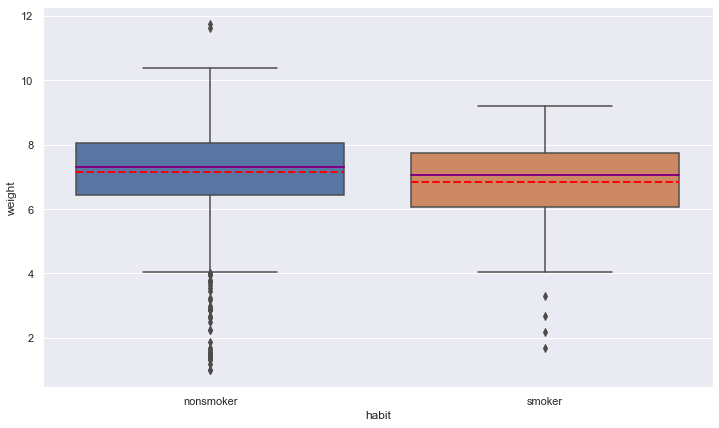

In [4]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='habit', y='weight', showmeans=True, meanline=True,
            medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

<p>From the chart above, the average weight of pregnant non smokers women is higher than the pregnant smoker women. Also, non smokers pregnant women has more weight than the pregnant smokers women. It can be said that pregnant <b>non smokers will have more weight</b> than pregnant <b>smokers women</b></p>

${\textbf{Question 2: }}$Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.

In [5]:
smoking_women = df[df['habit'] == 'smoker']
non_smoking_women = df[df['habit'] == 'nonsmoker']

Parameter of Interest: p1 - p2, where p1 = smokers and p2 = non_smokers

Null Hypothesis: p1 - p2 = 0
Alternative Hypthosis: p1 - p2 ≠ = 0

In [6]:
len_smoker_women = len(smoking_women)
len_non_smoking_women = len(non_smoking_women)

std_smoker_women = smoking_women['weight'].std()
std_non_smoker_women = non_smoking_women['weight'].std()

mean_smoker_women = smoking_women['weight'].mean()
mean_non_smoker_women = non_smoking_women['weight'].mean()
print('Smokers', len_smoker_women, std_smoker_women, mean_smoker_women)
print('Non Smokers', len_non_smoking_women, std_non_smoker_women, mean_non_smoker_women)

Smokers 126 1.386179777158495 6.828730158730159
Non Smokers 873 1.518680606114912 7.144272623138602


In [7]:
# check Hypothesis
sm.stats.ttest_ind(smoking_women['weight'].dropna(), non_smoking_women['weight'].dropna(),
               alternative='two-sided')

(-2.20339628129615, 0.027794878776409186, 997.0)

### Conclusion

Since the p-value is low **0.027795**, we can reject the null hypothesis that the Weight of babies of non-smoker women is the same as the weight of babies of smoker women

${\textbf{Question 3: }}$Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

In [8]:
mature_mothers = df[df['mature']== 'mature mom']
younger_mothers = df[df['mature']== 'younger mom']

In [9]:
sm.stats.ttest_ind(mature_mothers['gained'].dropna(), younger_mothers['gained'].dropna())

(-1.3150120052394427, 0.18881633450571897, 971.0)

### Conclusion

Since the p-value **0.18882**, we can not reject the null hypothesis that the Average Weight gained by mature mothers is different as the weight gained by younger mothers

${\textbf{Question 4: }}$Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.

In [10]:
len_smoker_women = len(smoking_women)
len_non_smoking_women = len(non_smoking_women)

std_smoker_women = smoking_women['weight'].std()
std_non_smoker_women = non_smoking_women['weight'].std()

mean_smoker_women = smoking_women['weight'].mean()
mean_non_smoker_women = non_smoking_women['weight'].mean()
print('Smokers', len_smoker_women, std_smoker_women, mean_smoker_women)
print('Non Smokers', len_non_smoking_women, std_non_smoker_women, mean_non_smoker_women)

Smokers 126 1.386179777158495 6.828730158730159
Non Smokers 873 1.518680606114912 7.144272623138602


In [11]:
diff_mean = mean_smoker_women - mean_non_smoker_women
multiplier = 1.97743 # 95% confidence int

std_error = np.sqrt((std_smoker_women)**2/len_smoker_women) +\
        ((std_non_smoker_women)**2 / len_non_smoking_women)
print('The Difference in Sample mean is ', diff_mean)
print('The Standard Error is ', std_error)
margin_of_error = multiplier * std_error
weight_diff_add = diff_mean + margin_of_error
weight_diff_sub = diff_mean - margin_of_error

print(f'95% confidence that the weight diffrence in smoking women and non \
        smoking women babies is between {weight_diff_add} and {weight_diff_sub}')

The Difference in Sample mean is  -0.315542464408443
The Standard Error is  0.12613262342698084
95% confidence that the weight diffrence in smoking women and non         smoking women babies is between -0.0661240308652283 and -0.5649608979516577
